In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Loading DataSet

In [17]:
df = pd.read_csv('D:/Data Science/Board Infinty/Interview session/project/Car_dekho/data.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


# Describing the data

In [18]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


# Datatypes of features

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


# Finding null values

In [20]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

# Finding Duplicates

In [21]:
df.duplicated().sum()

1202

# Shape of dataset

In [22]:
df.shape

(8128, 13)

# Dropping Duplicates

In [23]:
df = df.drop_duplicates()

# Shape after dropping duplicates

In [24]:
df.shape

(6926, 13)

# Dropping NA values

In [25]:
df.dropna(axis=0, inplace=True)

In [26]:
df.shape

(6717, 13)

In [27]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

# Dropping Torque feature from the dataset

In [28]:
df.drop(['torque'],axis=1,inplace=True)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


# Unique values in owner feature

In [29]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [30]:
df['owner'] = df['owner'].replace({'Test Drive Car':0,'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4})

In [31]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,5.0


# Calculating Car's age

In [32]:
df['Age'] = 2021-df['year']

In [33]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,5.0,7
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,5.0,7
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,5.0,15
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,5.0,11
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,5.0,14


# Dropping year now

In [34]:
df.drop(['year'],axis=1,inplace=True)

In [35]:
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,5.0,7
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,5.0,7
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,5.0,15
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,5.0,11
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,5.0,14


# Striking off the unit values in mileage,engine,max_power

In [36]:
df['mileage'] = df['mileage'].str.strip('kmpl').str.strip('km/kg')

In [37]:
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,1,23.4,1248 CC,74 bhp,5.0,7
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,2,21.14,1498 CC,103.52 bhp,5.0,7
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,3,17.7,1497 CC,78 bhp,5.0,15
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,1,23.0,1396 CC,90 bhp,5.0,11
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,1,16.1,1298 CC,88.2 bhp,5.0,14


In [38]:
df['engine'] = df['engine'].str.strip('CC')

In [39]:
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,1,23.4,1248,74 bhp,5.0,7
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,2,21.14,1498,103.52 bhp,5.0,7
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,3,17.7,1497,78 bhp,5.0,15
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,1,23.0,1396,90 bhp,5.0,11
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,1,16.1,1298,88.2 bhp,5.0,14


In [40]:
df['max_power']= df['max_power'].str.strip('bhp')

In [41]:
df

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,1,23.4,1248,74,5.0,7
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,2,21.14,1498,103.52,5.0,7
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,3,17.7,1497,78,5.0,15
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,1,23.0,1396,90,5.0,11
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,1,16.1,1298,88.2,5.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,260000,50000,Petrol,Individual,Manual,2,18.9,998,67.1,5.0,8
8122,Hyundai i20 Magna 1.4 CRDi,475000,80000,Diesel,Individual,Manual,2,22.54,1396,88.73,5.0,7
8123,Hyundai i20 Magna,320000,110000,Petrol,Individual,Manual,1,18.5,1197,82.85,5.0,8
8124,Hyundai Verna CRDi SX,135000,119000,Diesel,Individual,Manual,4,16.8,1493,110,5.0,14


In [42]:
#COonverting seats into string

In [43]:
df['seats'] = df['seats'].astype(str)

In [44]:
df

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,1,23.4,1248,74,5.0,7
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,2,21.14,1498,103.52,5.0,7
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,3,17.7,1497,78,5.0,15
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,1,23.0,1396,90,5.0,11
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,1,16.1,1298,88.2,5.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,260000,50000,Petrol,Individual,Manual,2,18.9,998,67.1,5.0,8
8122,Hyundai i20 Magna 1.4 CRDi,475000,80000,Diesel,Individual,Manual,2,22.54,1396,88.73,5.0,7
8123,Hyundai i20 Magna,320000,110000,Petrol,Individual,Manual,1,18.5,1197,82.85,5.0,8
8124,Hyundai Verna CRDi SX,135000,119000,Diesel,Individual,Manual,4,16.8,1493,110,5.0,14


In [45]:
#Converting mileage,engine,max_power into numeric

In [46]:
df['mileage'] = pd.to_numeric(df['mileage'])

In [47]:
df['engine'] = pd.to_numeric(df['engine'])

In [48]:
df['max_power'] = pd.to_numeric(df['max_power'])

In [49]:
df

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,1,23.40,1248,74.00,5.0,7
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,2,21.14,1498,103.52,5.0,7
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,3,17.70,1497,78.00,5.0,15
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,1,23.00,1396,90.00,5.0,11
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,1,16.10,1298,88.20,5.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,260000,50000,Petrol,Individual,Manual,2,18.90,998,67.10,5.0,8
8122,Hyundai i20 Magna 1.4 CRDi,475000,80000,Diesel,Individual,Manual,2,22.54,1396,88.73,5.0,7
8123,Hyundai i20 Magna,320000,110000,Petrol,Individual,Manual,1,18.50,1197,82.85,5.0,8
8124,Hyundai Verna CRDi SX,135000,119000,Diesel,Individual,Manual,4,16.80,1493,110.00,5.0,14


In [50]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [51]:
df.shape

(6717, 12)

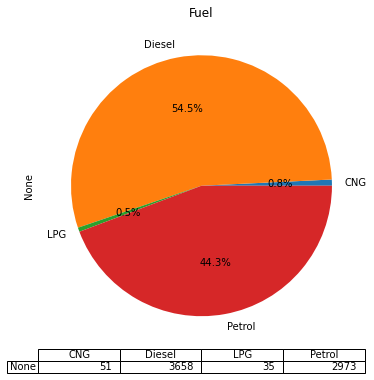

In [52]:
df.groupby(['fuel']).size().plot(kind="pie",stacked=True,figsize=(6, 6),table=True,title="Fuel",autopct='%1.1f%%')
plt.show()

In [53]:
#We can observe can LPG and CNG contribute to very small scale, and they have higher mileage, this will effect the data. We can
#drop this feature

In [54]:
df = df[~df['fuel'].isin(['CNG','LPG'])]

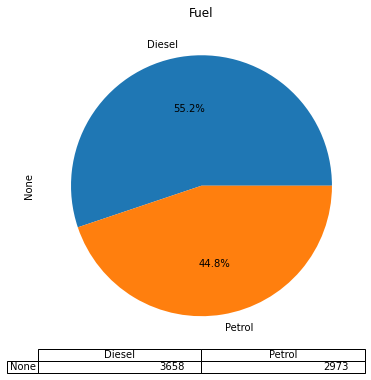

In [55]:
df.groupby(['fuel']).size().plot(kind="pie",stacked=True,figsize=(6, 6),table=True,title="Fuel",autopct='%1.1f%%')
plt.show()

In [56]:
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Age
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,1,23.40,1248,74.00,5.0,7
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,2,21.14,1498,103.52,5.0,7
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,3,17.70,1497,78.00,5.0,15
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,1,23.00,1396,90.00,5.0,11
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,1,16.10,1298,88.20,5.0,14


In [57]:
#Getting the company name from the name 

In [58]:
df['company'] = df['name'].str.split(' ').str.get(0)

In [59]:
df

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Age,company
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,1,23.40,1248,74.00,5.0,7,Maruti
1,Skoda Rapid 1.5 TDI Ambition,370000,120000,Diesel,Individual,Manual,2,21.14,1498,103.52,5.0,7,Skoda
2,Honda City 2017-2020 EXi,158000,140000,Petrol,Individual,Manual,3,17.70,1497,78.00,5.0,15,Honda
3,Hyundai i20 Sportz Diesel,225000,127000,Diesel,Individual,Manual,1,23.00,1396,90.00,5.0,11,Hyundai
4,Maruti Swift VXI BSIII,130000,120000,Petrol,Individual,Manual,1,16.10,1298,88.20,5.0,14,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,260000,50000,Petrol,Individual,Manual,2,18.90,998,67.10,5.0,8,Maruti
8122,Hyundai i20 Magna 1.4 CRDi,475000,80000,Diesel,Individual,Manual,2,22.54,1396,88.73,5.0,7,Hyundai
8123,Hyundai i20 Magna,320000,110000,Petrol,Individual,Manual,1,18.50,1197,82.85,5.0,8,Hyundai
8124,Hyundai Verna CRDi SX,135000,119000,Diesel,Individual,Manual,4,16.80,1493,110.00,5.0,14,Hyundai


In [60]:
df.drop(['name'],axis=1,inplace=True)

In [61]:
df

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Age,company
0,450000,145500,Diesel,Individual,Manual,1,23.40,1248,74.00,5.0,7,Maruti
1,370000,120000,Diesel,Individual,Manual,2,21.14,1498,103.52,5.0,7,Skoda
2,158000,140000,Petrol,Individual,Manual,3,17.70,1497,78.00,5.0,15,Honda
3,225000,127000,Diesel,Individual,Manual,1,23.00,1396,90.00,5.0,11,Hyundai
4,130000,120000,Petrol,Individual,Manual,1,16.10,1298,88.20,5.0,14,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,260000,50000,Petrol,Individual,Manual,2,18.90,998,67.10,5.0,8,Maruti
8122,475000,80000,Diesel,Individual,Manual,2,22.54,1396,88.73,5.0,7,Hyundai
8123,320000,110000,Petrol,Individual,Manual,1,18.50,1197,82.85,5.0,8,Hyundai
8124,135000,119000,Diesel,Individual,Manual,4,16.80,1493,110.00,5.0,14,Hyundai


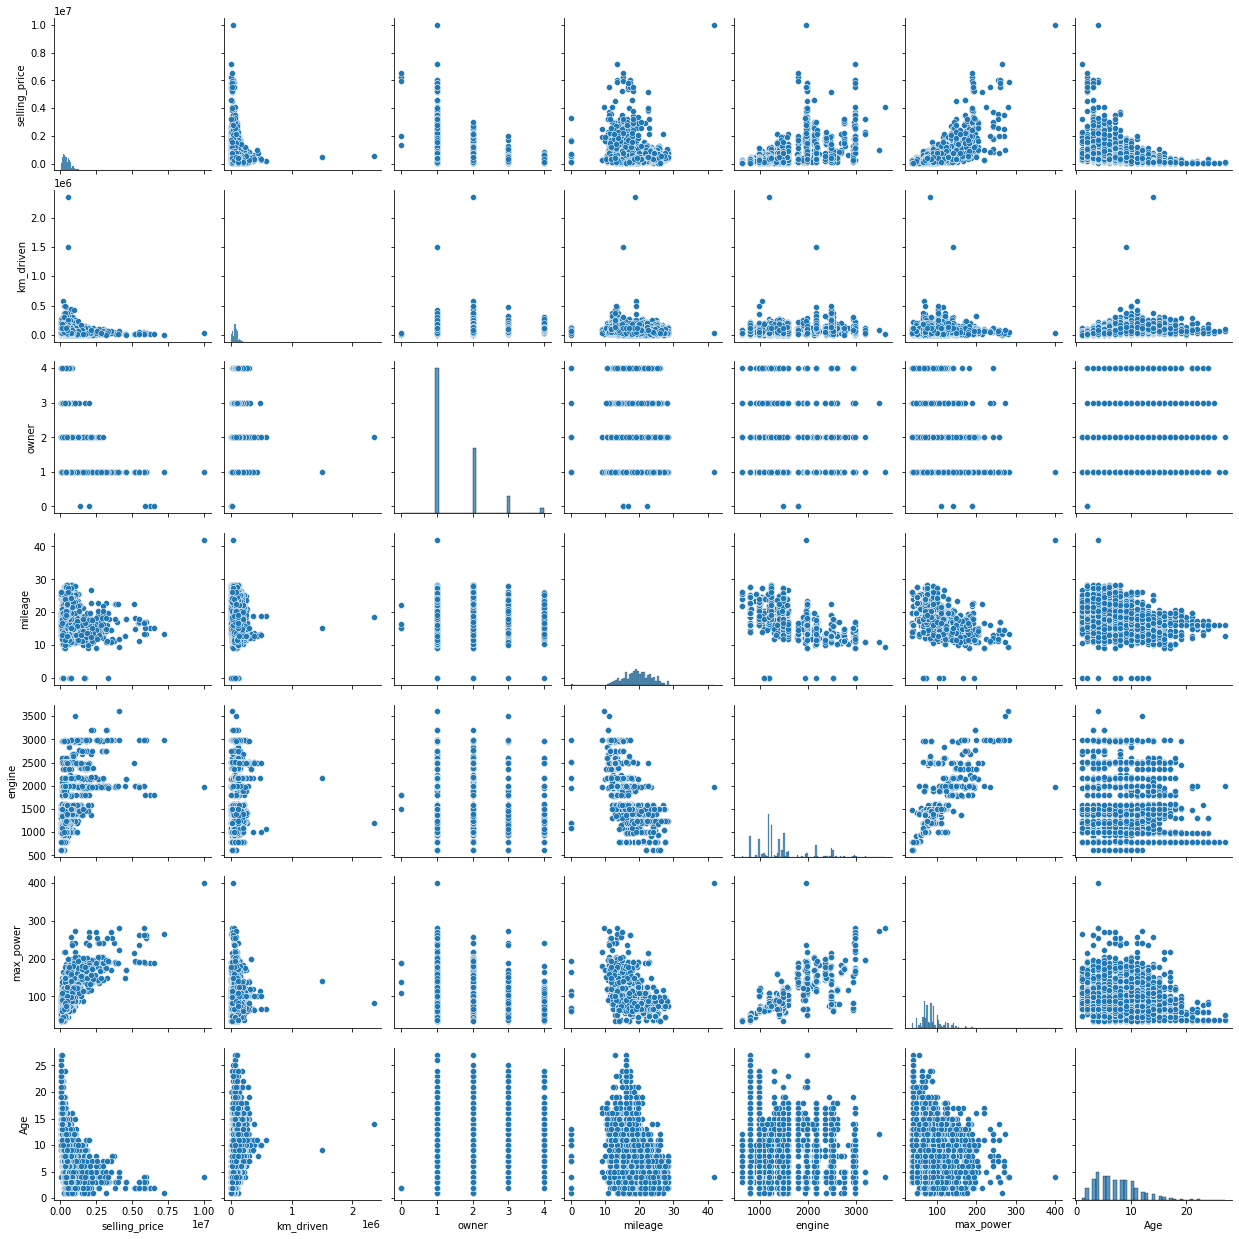

In [62]:
sns.pairplot(df)

In [63]:
#Heatmap

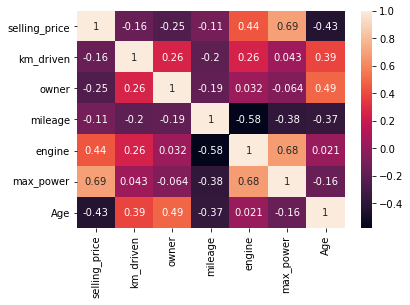

In [64]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [65]:
df = df[df['selling_price'] < 2500000]
df['selling_price'] = np.log(df['selling_price'])

In [66]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Age,company
0,13.017003,145500,Diesel,Individual,Manual,1,23.40,1248,74.00,5.0,7,Maruti
1,12.821258,120000,Diesel,Individual,Manual,2,21.14,1498,103.52,5.0,7,Skoda
2,11.970350,140000,Petrol,Individual,Manual,3,17.70,1497,78.00,5.0,15,Honda
3,12.323856,127000,Diesel,Individual,Manual,1,23.00,1396,90.00,5.0,11,Hyundai
4,11.775290,120000,Petrol,Individual,Manual,1,16.10,1298,88.20,5.0,14,Maruti


In [67]:
df = df[df['km_driven'] < 300000]

In [68]:
df = df[(df['mileage'] > 5) & (df['mileage'] < 35)]

In [69]:
df = df[df['max_power'] < 300]
df['max_power'] = np.log(df['max_power'])

In [70]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Age,company
0,13.017003,145500,Diesel,Individual,Manual,1,23.40,1248,4.304065,5.0,7,Maruti
1,12.821258,120000,Diesel,Individual,Manual,2,21.14,1498,4.639765,5.0,7,Skoda
2,11.970350,140000,Petrol,Individual,Manual,3,17.70,1497,4.356709,5.0,15,Honda
3,12.323856,127000,Diesel,Individual,Manual,1,23.00,1396,4.499810,5.0,11,Hyundai
4,11.775290,120000,Petrol,Individual,Manual,1,16.10,1298,4.479607,5.0,14,Maruti


In [71]:
df = pd.get_dummies(data = df, drop_first=True)
df.head()

,selling_price,km_driven,owner,mileage,engine,max_power,Age,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,company_Mercedes-Benz,company_Mitsubishi,company_Nissan,company_Opel,company_Renault,company_Skoda,company_Tata,company_Toyota,company_Volkswagen,company_Volvo
0,13.017003,145500,1,23.40,1248,4.304065,7,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,12.821258,120000,2,21.14,1498,4.639765,7,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,11.970350,140000,3,17.70,1497,4.356709,15,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,12.323856,127000,1,23.00,1396,4.499810,11,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,11.775290,120000,1,16.10,1298,4.479607,14,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
df.columns

Index(['selling_price', 'km_driven', 'owner', 'mileage', 'engine', 'max_power',
       'Age', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual', 'seats_14.0',
       'seats_4.0', 'seats_5.0', 'seats_6.0', 'seats_7.0', 'seats_8.0',
       'seats_9.0', 'company_Ashok', 'company_Audi', 'company_BMW',
       'company_Chevrolet', 'company_Daewoo', 'company_Datsun', 'company_Fiat',
       'company_Force', 'company_Ford', 'company_Honda', 'company_Hyundai',
       'company_Isuzu', 'company_Jaguar', 'company_Jeep', 'company_Kia',
       'company_Land', 'company_MG', 'company_Mahindra', 'company_Maruti',
       'company_Mercedes-Benz', 'company_Mitsubishi', 'company_Nissan',
       'company_Opel', 'company_Renault', 'company_Skoda', 'company_Tata',
       'company_Toyota', 'company_Volkswagen', 'company_Volvo'],
      dtype='object')

In [73]:
x = df.drop(['selling_price'],axis=1)
y = df['selling_price']

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_var = ['km_driven', 'mileage', 'engine', 'max_power', 'Age']
x_train[num_var] = scaler.fit_transform(x_train[num_var])
x_test[num_var] = scaler.transform(x_test[num_var])

# Random Forest Regressor

In [61]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
select = RFE(RandomForestRegressor(n_estimators=100, random_state=42),
                 n_features_to_select=40)
select.fit(x_train, y_train)
x_train_rfe= select.transform(x_train)
x_test_rfe= select.transform(x_test)

In [62]:
#Main function to fit all regression model, check r2_score,check cross-validation score, plot residual plot and plot scatterplot of y_test_prediction vs y_test

In [63]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

r2_train_scores = []
r2_test_scores = []
cv_mean = []

def car_price_prediction_model(model):
    model.fit(x_train, y_train)
    
    #R2 score of training set
    y_train_pred = model.predict(x_train)
    r2_train = r2_score(y_train, y_train_pred)
    r2_train_scores.append(round(r2_train,2))
    
    #R2 score of test set
    y_test_pred = model.predict(x_test)
    r2_test = r2_score(y_test, y_test_pred)
    r2_test_scores.append(round(r2_test,2))
    
    # CV score of training set
    cv_training = cross_val_score(model, x_train, y_train, cv=5)
    cv_mean_training = cv_training.mean()
    cv_mean.append(round(cv_mean_training,2))
    
    
    
    # Printing each score
    print("Training set R2 scores: ",round(r2_train,2))
    print("Test set R2 scores: ",round(r2_test,2))
    print("Training cross validation score: ", cv_training)
    print("Training cross validation mean score: ",round(cv_mean_training,2))
    
    
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_train_pred),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_pred')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_test_pred)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

In [64]:
#Main function to fit all regression model based on the RFE-dataset, check r2_score,check cross-validation score,
#plot residual plot and plot scatterplot of y_test_prediction_rfe vs y_test


In [65]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

r2_train_scores_rfe = []
r2_test_scores_rfe = []
cv_mean_rfe = []

def car_price_prediction_model_rfe(model):
    model.fit(x_train_rfe, y_train)
    
    
    #R2 score of RFE training set
    y_train_pred_rfe = model.predict(x_train_rfe)
    r2_train_rfe = r2_score(y_train, y_train_pred_rfe)
    r2_train_scores_rfe.append(round(r2_train_rfe,2))
    
    #R2 score of RFE test set
    y_test_pred_rfe = model.predict(x_test_rfe)
    r2_test_rfe = r2_score(y_test, y_test_pred_rfe)
    r2_test_scores_rfe.append(round(r2_test_rfe,2))

    # CV score of RFE training set
    cv_training_rfe = cross_val_score(model, x_train_rfe, y_train, cv=5)
    cv_mean_training_rfe = cv_training_rfe.mean()
    cv_mean_rfe.append(round(cv_mean_training_rfe,2))
    
    # Printing each score
    print("Training set R2 scores: ",round(r2_train_rfe,2))
    print("Test set R2 scores: ",round(r2_test_rfe,2))
    print("Training cross validation score: ", cv_training_rfe)
    print("Training cross validation mean score: ",round(cv_mean_training_rfe,2))
    
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of RFE-Train samples')
    sns.distplot((y_train-y_train_pred_rfe),hist = False,ax = ax[0])
    ax[0].set_xlabel('residual')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test_rfe')
    ax[1].scatter(x = y_test, y = y_test_pred_rfe)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test_rfe')
    
    plt.show()

# Linear Regression

In [66]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

Training set R2 scores:  0.89
Test set R2 scores:  0.88
Training cross validation score:  [0.88671306 0.87985227 0.88360141 0.88242122 0.88243903]
Training cross validation mean score:  0.88


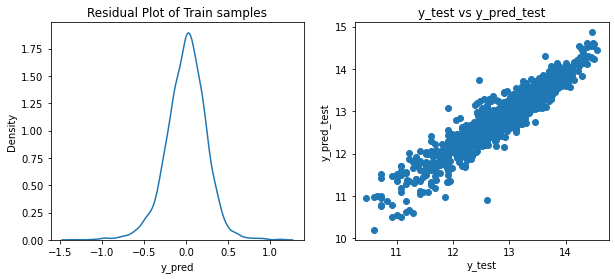

In [67]:
car_price_prediction_model(lm)

# Recursive Feature Elimination

Training set R2 scores:  0.89
Test set R2 scores:  0.88
Training cross validation score:  [0.88698308 0.87942592 0.88441157 0.88243763 0.88237783]
Training cross validation mean score:  0.88


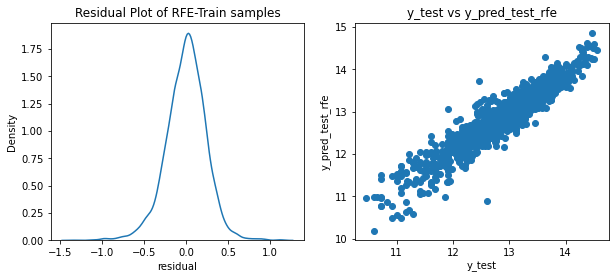

In [68]:
car_price_prediction_model_rfe(lm)

# Linear Regression LASSO

Training set R2 scores:  0.88
Test set R2 scores:  0.88
Training cross validation score:  [0.88183797 0.87949242 0.87366133 0.87764228 0.8778026 ]
Training cross validation mean score:  0.88


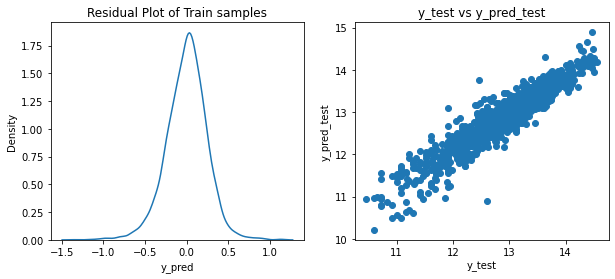

In [69]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14)
ls_rs = RandomizedSearchCV(estimator=ls, param_distributions=dict(alpha=alpha))
car_price_prediction_model(ls_rs)

Training set R2 scores:  0.88
Test set R2 scores:  0.88
Training cross validation score:  [0.87620183 0.87949242 0.88021472 0.87764228 0.8778026 ]
Training cross validation mean score:  0.88


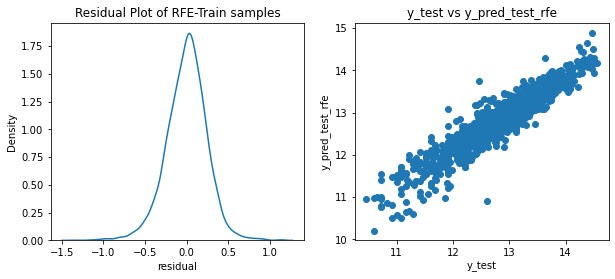

In [70]:
car_price_prediction_model_rfe(ls_rs)

# Linear Regression RIDGE

Training set R2 scores:  0.89
Test set R2 scores:  0.88
Training cross validation score:  [0.88711575 0.88045527 0.88375419 0.88118862 0.882318  ]
Training cross validation mean score:  0.88


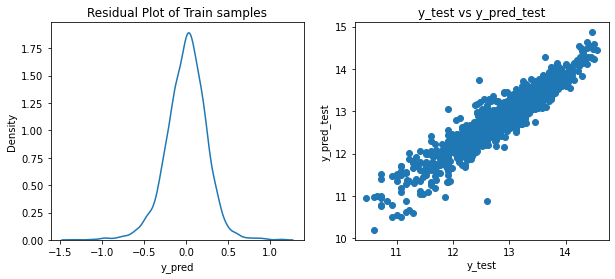

In [71]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

rg = Ridge()
alpha = np.logspace(-3,3,num=14)
rg_rs = RandomizedSearchCV(estimator=rg, param_distributions=dict(alpha=alpha))
car_price_prediction_model(rg_rs)

In [72]:
#RFE

Training set R2 scores:  0.89
Test set R2 scores:  0.88
Training cross validation score:  [0.88713321 0.87962909 0.88362158 0.88238201 0.88224052]
Training cross validation mean score:  0.88


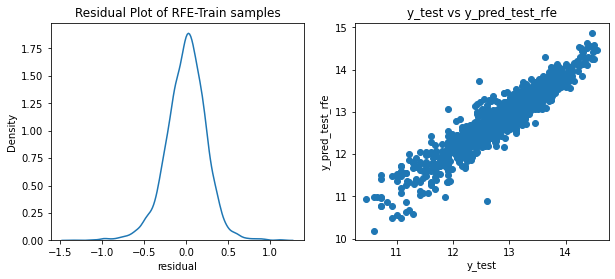

In [73]:
car_price_prediction_model_rfe(rg_rs)

# Extreme Gradient Boosting Regressor

In [74]:
from xgboost import XGBRegressor
xg = XGBRegressor(verbosity= 0)

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]


parameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

xg_rs = RandomizedSearchCV(estimator=xg, param_distributions=parameter_grid)

Training set R2 scores:  0.97
Test set R2 scores:  0.92
Training cross validation score:  [0.91693392 0.91615421 0.91546485 0.90499911 0.90676831]
Training cross validation mean score:  0.91


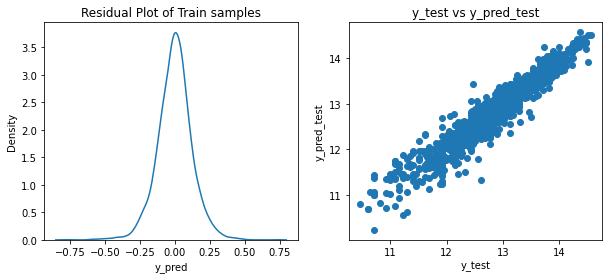

In [75]:
car_price_prediction_model(xg_rs)

# Gradient Boosting Regressor


In [76]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

Training set R2 scores:  0.94
Test set R2 scores:  0.92
Training cross validation score:  [0.91306266 0.91893506 0.91520787 0.90164395 0.90706802]
Training cross validation mean score:  0.91


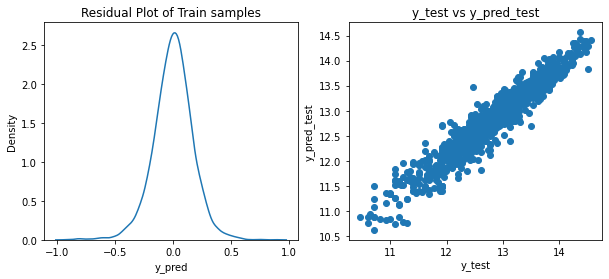

In [78]:
car_price_prediction_model(gb_rs)

In [80]:
model_filename = 'model.pkl'
joblib.dump(xg_rs,model_filename)

['model.pkl']

In [81]:
y_pred = xg_rs.predict(x_test)

In [82]:
y_pred

array([12.016998, 14.339436, 12.004882, ..., 13.228288, 13.614727,
       13.350695], dtype=float32)

In [92]:
xg_rs.predict([1])

TypeError: Input data can not be a list.

In [94]:
xg_rs.predict(np.array([[1]]))

ValueError: feature_names mismatch: ['km_driven', 'owner', 'mileage', 'engine', 'max_power', 'Age', 'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer', 'transmission_Manual', 'seats_14.0', 'seats_4.0', 'seats_5.0', 'seats_6.0', 'seats_7.0', 'seats_8.0', 'seats_9.0', 'company_Ashok', 'company_Audi', 'company_BMW', 'company_Chevrolet', 'company_Daewoo', 'company_Datsun', 'company_Fiat', 'company_Force', 'company_Ford', 'company_Honda', 'company_Hyundai', 'company_Isuzu', 'company_Jaguar', 'company_Jeep', 'company_Kia', 'company_Land', 'company_MG', 'company_Mahindra', 'company_Maruti', 'company_Mercedes-Benz', 'company_Mitsubishi', 'company_Nissan', 'company_Opel', 'company_Renault', 'company_Skoda', 'company_Tata', 'company_Toyota', 'company_Volkswagen', 'company_Volvo'] ['f0']
expected seats_14.0, seats_5.0, company_Ashok, company_MG, company_Isuzu, company_Hyundai, company_Audi, company_Mercedes-Benz, company_Mitsubishi, company_Renault, company_Fiat, Age, company_Opel, company_BMW, mileage, company_Honda, company_Force, company_Ford, seller_type_Individual, seller_type_Trustmark Dealer, company_Maruti, company_Skoda, company_Kia, seats_8.0, company_Daewoo, company_Volkswagen, seats_6.0, company_Datsun, company_Mahindra, company_Jaguar, company_Jeep, km_driven, seats_7.0, company_Chevrolet, max_power, company_Volvo, seats_4.0, company_Tata, owner, company_Toyota, company_Land, seats_9.0, transmission_Manual, engine, fuel_Petrol, company_Nissan in input data
training data did not have the following fields: f0

In [8]:
new_dict = {"data": [{"km_driven": 79200,"owner": 2,"mileage": 14,"engine": 1599,"max_power": 1,"Age": 1,"fuel_petrol":1,
                      "seller_type_Individual": 1,"seller_type_Trustmark Dealer":0,"transmission_Manual": 0,"seats_14.0":0,
                      "seats_4.0":1,"seats_5.0":0,"seats_6.0":0,"seats_7.0":0,"seats_8.0":0,"seats_9.0":0,"company_Ashok":0,
                      "company_Audi":0,"company_BMW":0,"company_Chevrolet":0,"company_Daewoo":0,"company_Datsun":0,
                      "company_Fiat":0,"company_Force":0,"company_Ford":0,"company_Honda":0,"company_Hyundai":0,
                      "company_Isuzu":0,"company_Jaguar":1,"company_Jeep":0,"company_Kia":0,"company_Land":0,"company_MG":0,
                      "company_Mahindra":0,"company_Maruti":0,"company_Mercedes-Benz":0,"company_Mitsubishi":0,
                      "company_Nissan":0,"company_Opel":0,"company_Renault":0,"company_Skoda":0,"company_Tata":0,
                      "company_Toyota":0,"company_Volkswagen":0,"company_Volvo": 0}]}

In [9]:
import pandas as pd

In [10]:
pd.DataFrame.from_dict(new_dict["data"])

,km_driven,owner,mileage,engine,max_power,Age,fuel_petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,...,company_Mercedes-Benz,company_Mitsubishi,company_Nissan,company_Opel,company_Renault,company_Skoda,company_Tata,company_Toyota,company_Volkswagen,company_Volvo
0,79200,2,14,1599,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
x_test.iloc[24,:]

km_driven                       1.064572
owner                           2.000000
mileage                        -1.456405
engine                          0.373813
max_power                       0.717454
Age                             1.438910
fuel_Petrol                     1.000000
seller_type_Individual          1.000000
seller_type_Trustmark Dealer    0.000000
transmission_Manual             1.000000
seats_14.0                      0.000000
seats_4.0                       0.000000
seats_5.0                       1.000000
seats_6.0                       0.000000
seats_7.0                       0.000000
seats_8.0                       0.000000
seats_9.0                       0.000000
company_Ashok                   0.000000
company_Audi                    0.000000
company_BMW                     0.000000
company_Chevrolet               0.000000
company_Daewoo                  0.000000
company_Datsun                  0.000000
company_Fiat                    0.000000
company_Force   

In [77]:
x_train.iloc[24,:]

km_driven                       0.842317
owner                           2.000000
mileage                        -0.350910
engine                         -0.359123
max_power                      -0.348549
Age                            -0.615505
fuel_Petrol                     0.000000
seller_type_Individual          1.000000
seller_type_Trustmark Dealer    0.000000
transmission_Manual             1.000000
seats_14.0                      0.000000
seats_4.0                       0.000000
seats_5.0                       0.000000
seats_6.0                       0.000000
seats_7.0                       1.000000
seats_8.0                       0.000000
seats_9.0                       0.000000
company_Ashok                   0.000000
company_Audi                    0.000000
company_BMW                     0.000000
company_Chevrolet               1.000000
company_Daewoo                  0.000000
company_Datsun                  0.000000
company_Fiat                    0.000000
company_Force   

In [78]:
x_test.iloc[24,:].to_dict()

{'km_driven': 1.0645717585904195,
 'owner': 2.0,
 'mileage': -1.4564046161878292,
 'engine': 0.37381293766043755,
 'max_power': 0.717453935639955,
 'Age': 1.4389098747086468,
 'fuel_Petrol': 1.0,
 'seller_type_Individual': 1.0,
 'seller_type_Trustmark Dealer': 0.0,
 'transmission_Manual': 1.0,
 'seats_14.0': 0.0,
 'seats_4.0': 0.0,
 'seats_5.0': 1.0,
 'seats_6.0': 0.0,
 'seats_7.0': 0.0,
 'seats_8.0': 0.0,
 'seats_9.0': 0.0,
 'company_Ashok': 0.0,
 'company_Audi': 0.0,
 'company_BMW': 0.0,
 'company_Chevrolet': 0.0,
 'company_Daewoo': 0.0,
 'company_Datsun': 0.0,
 'company_Fiat': 0.0,
 'company_Force': 0.0,
 'company_Ford': 0.0,
 'company_Honda': 0.0,
 'company_Hyundai': 1.0,
 'company_Isuzu': 0.0,
 'company_Jaguar': 0.0,
 'company_Jeep': 0.0,
 'company_Kia': 0.0,
 'company_Land': 0.0,
 'company_MG': 0.0,
 'company_Mahindra': 0.0,
 'company_Maruti': 0.0,
 'company_Mercedes-Benz': 0.0,
 'company_Mitsubishi': 0.0,
 'company_Nissan': 0.0,
 'company_Opel': 0.0,
 'company_Renault': 0.0,
 'c